In [1]:
import pandas as pd
import talib as ta

In [2]:
df = pd.read_csv("./data/BTC-USD.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [3]:
# deleting first column

# 1)
df.drop(columns=df.columns[0], axis=1, inplace=True)
# 2)
df = df.iloc[: , 1:]
# 3)
del df[df.columns[0]]

In [4]:
# remove Index column
df.reset_index(drop=True)

,Open,Close,Volume,Adj Close
0,465.864014,457.334015,21056800,457.334015
1,456.859985,424.440002,34483200,424.440002
2,424.102997,394.795990,37919700,394.795990
3,394.673004,408.903992,36863600,408.903992
4,408.084991,398.821014,26580100,398.821014
...,...,...,...,...
2647,48900.464844,47665.425781,27268150947,47665.425781
2648,47653.730469,46202.144531,32902725329,46202.144531
2649,46219.253906,46848.777344,26098292690,46848.777344
2650,46853.867188,46707.015625,25154053861,46707.015625


In [5]:
df = pd.read_csv("./data/ORG_KRW_BTC.csv")
df.head()

,Unnamed: 0,open,high,low,close,volume,value
0,2022-10-03 18:00:00,27863000.0,27869000.0,27765000.0,27816000.0,107.440733,2.987476e+09
1,2022-10-03 19:00:00,27816000.0,27901000.0,27785000.0,27880000.0,125.624060,3.499568e+09
2,2022-10-03 20:00:00,27887000.0,27920000.0,27848000.0,27900000.0,92.692740,2.584514e+09
3,2022-10-03 21:00:00,27901000.0,27933000.0,27846000.0,27902000.0,109.033327,3.041022e+09
4,2022-10-03 22:00:00,27920000.0,27986000.0,27776000.0,27838000.0,286.737056,7.995750e+09


In [6]:
df["close_diff"] = (df.close - df.close.shift(1))/df.close*100
df.head()

,Unnamed: 0,open,high,low,close,volume,value,close_diff
0,2022-10-03 18:00:00,27863000.0,27869000.0,27765000.0,27816000.0,107.440733,2.987476e+09,NaN
1,2022-10-03 19:00:00,27816000.0,27901000.0,27785000.0,27880000.0,125.624060,3.499568e+09,0.229555
2,2022-10-03 20:00:00,27887000.0,27920000.0,27848000.0,27900000.0,92.692740,2.584514e+09,0.071685
3,2022-10-03 21:00:00,27901000.0,27933000.0,27846000.0,27902000.0,109.033327,3.041022e+09,0.007168
4,2022-10-03 22:00:00,27920000.0,27986000.0,27776000.0,27838000.0,286.737056,7.995750e+09,-0.229902


In [7]:
df.open[:5]

0    27863000.0
1    27816000.0
2    27887000.0
3    27901000.0
4    27920000.0
Name: open, dtype: float64

In [8]:
df.close[:5]

0    27816000.0
1    27880000.0
2    27900000.0
3    27902000.0
4    27838000.0
Name: close, dtype: float64

In [9]:
open_lastclose_ratio = df.open / df.close.shift(1)
open_lastclose_ratio[:5]

0         NaN
1    1.000000
2    1.000251
3    1.000036
4    1.000645
dtype: float64

In [10]:
df["open_lastclose_ratio"] = df.open / df.close.shift(1)
df["high_close_ratio"] = df.high / df.close
df["low_close_ratio"] = df.low / df.close
df["diffratio"] = df.close / df.close.shift(1)
df["volume_lastvolume_ratio"] = df.volume / df.volume.shift(1)
df["ma5"] = ta.SMA(df.close.to_numpy(), 5)
df["ma10"] = ta.SMA(df.close.to_numpy(), 10)
df["ma20"] = ta.SMA(df.close.to_numpy(), 20)
df["ma60"] = ta.SMA(df.close.to_numpy(), 60)
df["ma120"] = ta.SMA(df.close.to_numpy(), 120)
df["vma5"] = ta.SMA(df.volume.to_numpy(), 5)
df["vma10"] = ta.SMA(df.volume.to_numpy(), 10)
df["vma20"] = ta.SMA(df.volume.to_numpy(), 20)
df["vma60"] = ta.SMA(df.volume.to_numpy(), 60)
df["vma120"] = ta.SMA(df.volume.to_numpy(), 120)
df["close_ma5_ratio"] = df.ma5 / df.close
df["close_ma10_ratio"] = df.ma10 / df.close
df["close_ma20_ratio"] = df.ma20 / df.close
df["close_ma60_ratio"] = df.ma60 / df.close
df["close_ma120_ratio"] = df.ma120 / df.close
df["volume_vma5_ratio"] = df.vma5 / df.volume
df["volume_vma10_ratio"] = df.vma10 / df.volume
df["volume_vma20_ratio"] = df.vma20 / df.volume
df["volume_vma60_ratio"] = df.vma60 / df.volume
df["volume_vma120_ratio"] = df.vma120 / df.volume

In [11]:
import matplotlib.pyplot as plt

In [12]:
df.dropna(axis=0, inplace=True)

<AxesSubplot: >

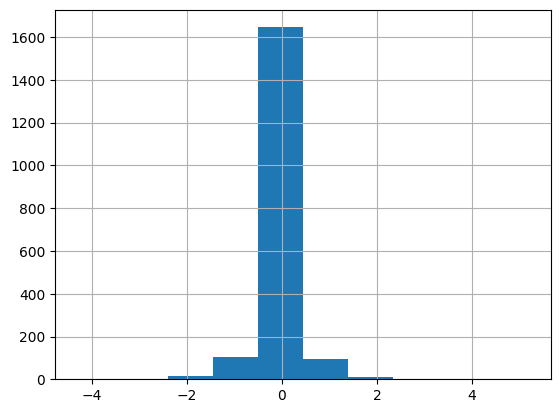

In [13]:
df.close_diff.hist()

In [14]:
df.close_diff.describe()

count    1881.000000
mean       -0.013998
std         0.459171
min        -4.299760
25%        -0.149560
50%        -0.003571
75%         0.136333
max         5.187518
Name: close_diff, dtype: float64

<AxesSubplot: >

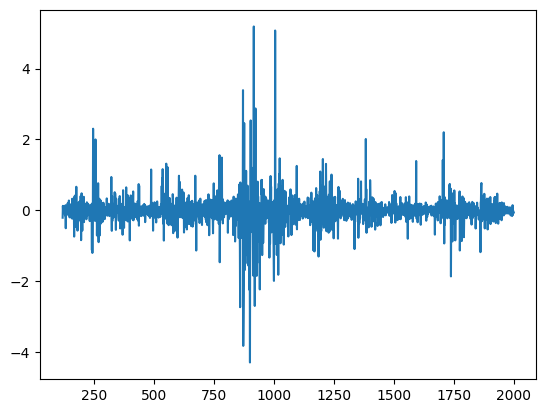

In [15]:
df.close_diff.plot()

In [16]:
df.close_diff.mean()

-0.013997867845851398

In [17]:
df.close_diff.argmax()

797

In [18]:
Q3 = df.close_diff.quantile(.75)
Q1 = df.close_diff.quantile(.25)
print(Q1)
print(Q3)
print((Q3-Q1)/100)

-0.14956001530381552
0.136332651670075
0.002858926669738905


In [19]:
close_diff = (df.close - df.close.shift(1))/df.close*100
close_diff.dropna()

120     0.122276
121    -0.035976
122     0.118581
123     0.000000
124    -0.010781
          ...   
1995    0.141669
1996   -0.132705
1997   -0.004576
1998   -0.091609
1999   -0.064167
Name: close, Length: 1880, dtype: float64

In [20]:
0.001 / 0.0003

3.3333333333333335